<a href="https://colab.research.google.com/github/galgieri/galgieri/blob/main/PWCorsoDS(2024_11_13).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import tensorflow as tf
import scipy.io
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import datasets, model_selection, metrics, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error

In [3]:
DS_SI_2010_2020=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/DS_Scardovari_Interno_2010_2020_dt.csv")
DF_SI_2010_2020 = pd.DataFrame(DS_SI_2010_2020)

In [4]:
DS_SM_2010_2020=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/DS_Scardovari_Mare_2010_2020_dt.csv")
DF_SM_2010_2020 = pd.DataFrame(DS_SM_2010_2020)

In [5]:
display(DF_SI_2010_2020)

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2010 00:00:00,NaN,NaN,NaN,NaN
1,01/01/2010 01:00:00,NaN,NaN,NaN,NaN
2,01/01/2010 02:00:00,NaN,NaN,NaN,NaN
3,01/01/2010 03:00:00,NaN,NaN,NaN,NaN
4,01/01/2010 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
159909,31/12/2020 21:30:00,NaN,NaN,NaN,NaN
159910,31/12/2020 22:00:00,NaN,NaN,NaN,NaN
159911,31/12/2020 22:30:00,NaN,NaN,NaN,NaN
159912,31/12/2020 23:00:00,NaN,NaN,NaN,NaN


In [6]:
display(DF_SM_2010_2020)

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2010 00:00:00,NaN,NaN,NaN,NaN
1,01/01/2010 01:00:00,NaN,NaN,NaN,NaN
2,01/01/2010 02:00:00,NaN,NaN,NaN,NaN
3,01/01/2010 03:00:00,NaN,NaN,NaN,NaN
4,01/01/2010 04:00:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
176031,31/12/2020 21:30:00,NaN,NaN,NaN,NaN
176032,31/12/2020 22:00:00,NaN,NaN,NaN,NaN
176033,31/12/2020 22:30:00,NaN,NaN,NaN,NaN
176034,31/12/2020 23:00:00,NaN,NaN,NaN,NaN


In [7]:
#
# eliminazione righe con valori nulli
#
DF_SI_2010_2020.dropna(axis=0, how='any', inplace=True)

In [8]:
DF_SI_2010_2020

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
3864,11/06/2010 01:00:00,22.70,8.38,32.00,20.30
3865,11/06/2010 02:00:00,22.30,8.38,32.00,20.30
3866,11/06/2010 03:00:00,21.90,8.38,32.00,20.30
3867,11/06/2010 04:00:00,21.50,8.38,32.00,20.30
3868,11/06/2010 05:00:00,21.20,8.39,32.00,20.30
...,...,...,...,...,...
159897,31/12/2020 15:30:00,7.00,8.58,40.11,25.32
159898,31/12/2020 16:00:00,7.04,8.58,40.16,25.35
159899,31/12/2020 16:30:00,6.99,8.58,40.21,25.38
159900,31/12/2020 17:00:00,6.98,8.58,40.24,25.40


In [9]:
#
# eliminazione righe con valori nulli
#
DF_SM_2010_2020.dropna(axis=0, how='any', inplace=True)

In [10]:
DF_SM_2010_2020

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
1481,03/03/2010 17:00:00,9.80,8.31,38.60,23.61
1482,03/03/2010 18:00:00,9.79,8.35,38.60,23.65
1483,03/03/2010 19:00:00,9.76,8.34,37.30,22.75
1484,03/03/2010 20:00:00,9.46,8.25,21.60,12.54
1485,03/03/2010 21:00:00,9.46,8.23,20.40,11.75
...,...,...,...,...,...
176019,31/12/2020 15:30:00,8.84,8.32,43.31,27.61
176020,31/12/2020 16:00:00,8.58,8.29,42.04,26.69
176021,31/12/2020 16:30:00,8.24,8.31,41.69,26.43
176022,31/12/2020 17:00:00,8.23,8.31,41.59,26.35


In [11]:
#
# definizione dei regressori per l'addestramento del modello di regressione lineare
#
ListaRegressori=["Temperatura","pH", "Conducibilita_Specifica_a_25C"]
x=DF_SM_2010_2020[ListaRegressori]
x

,Temperatura,pH,Conducibilita_Specifica_a_25C
1481,9.80,8.31,38.60
1482,9.79,8.35,38.60
1483,9.76,8.34,37.30
1484,9.46,8.25,21.60
1485,9.46,8.23,20.40
...,...,...,...
176019,8.84,8.32,43.31
176020,8.58,8.29,42.04
176021,8.24,8.31,41.69
176022,8.23,8.31,41.59


In [12]:
#
# definizione della variabile target per l'addestramento del modello di regressione lineare
#
VariabileTarget="Salinita"
y=DF_SM_2010_2020[VariabileTarget]
y

,Salinita
1481,23.61
1482,23.65
1483,22.75
1484,12.54
1485,11.75
...,...
176019,27.61
176020,26.69
176021,26.43
176022,26.35


In [13]:
#
# suddivisione del dataset in 2 parti (training pari al 75% e test pari al 25%)
#

X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(x,y, train_size=0.75, random_state=19)

In [14]:
#X_train.shape, X_test.shape
print("Training dataset", X_train.shape)
print("Test dataset", X_test.shape)

Training dataset (90166, 3)
Test dataset (30056, 3)


In [15]:
model=LinearRegression()
model.fit(X_train,y_train)
print('equazione lineare trovata y=ax1+bx2+cx3+d\n')
print('x1=Temperatura, x2=pH, x3=Conducibilita_Specifica_a_25C\n')
print('Coefficienti del modello a,b,c:', model.coef_)
print('Intercetta d ',model.intercept_)
print('\n')
print('equazione finale \n')
print('Salinita = ',model.coef_[0],"* Temperatura + ",model.coef_[1],"* pH + ", model.coef_[2],"* Conducibilita_Specifica_a_25C +(",model.intercept_,")")

equazione lineare trovata y=ax1+bx2+cx3+d

x1=Temperatura, x2=pH, x3=Conducibilita_Specifica_a_25C

Coefficienti del modello a,b,c: [0.04621347 0.00105232 0.68645667]
Intercetta d  -2.7659343528111187


equazione finale 

Salinita =  0.046213467367428256 * Temperatura +  0.0010523227640560906 * pH +  0.6864566664924472 * Conducibilita_Specifica_a_25C +( -2.7659343528111187 )


In [16]:
#
# previsione dei valori del target sul dataset di training
#
predict_train = model.predict(X_train)
print('Dati previsti training :',predict_train)


Dati previsti training : [33.51118071 29.04096577 28.08829977 ... 37.10690365 28.83308681
 29.76340152]


In [17]:
#
# Accuracy Score
#
rmse_train = mean_squared_error(y_train,predict_train)**(0.5)
print("\n")
print('radice quadrata dello scarto quadratico medio calcolato sul modello sui dati di training : ' , rmse_train)
print("\n")



radice quadrata dello scarto quadratico medio calcolato sul modello sui dati di training :  1.03486497390341




In [18]:
#
# previsione dei valori del target sul dataset di test
#
predict_test = model.predict(X_test)
print('Dati previsti test : ',predict_test)

Dati previsti test :  [18.29642444 30.67005919 36.02192291 ... 33.01254551 25.81340511
 31.48399072]


In [19]:
# Accuracy Score
rmse_train = mean_squared_error(y_test,predict_test)**(0.5)
print("\n")
print('radice quadrata dello scarto quadratico medio calcolato sul modello sui dati di test : ' , rmse_train)
print("\n")



radice quadrata dello scarto quadratico medio calcolato sul modello sui dati di test :  1.0553945600774914




In [20]:
# R^2 (coefficiente di determinazione) funzione di punteggio di regressione.
# Il miglior punteggio possibile è 1,0 e può essere negativo (perché il modello può essere arbitrariamente peggiore).
# Un modello costante che predice sempre il valore atteso di y, trascurando le caratteristiche di input, otterrebbe un punteggio R^2 di 0,0.

sklearn.metrics.r2_score(y_train,predict_train,sample_weight=None,multioutput='uniform_average')

0.9655099578686988

In [21]:
Yfit=model.predict(X_test)
print("valori di salinità previsti")
Yfit


valori di salinità previsti


array([18.29642444, 30.67005919, 36.02192291, ..., 33.01254551,
       25.81340511, 31.48399072])

In [22]:
# R^2 (coefficiente di determinazione) funzione di punteggio di regressione.
# Il miglior punteggio possibile è 1,0 e può essere negativo (perché il modello può essere arbitrariamente peggiore).
# Un modello costante che predice sempre il valore atteso di y, trascurando le caratteristiche di input, otterrebbe un punteggio R^2 di 0,0.
sklearn.metrics.r2_score(y_test,Yfit,sample_weight=None,multioutput='uniform_average')

0.9644953507709343

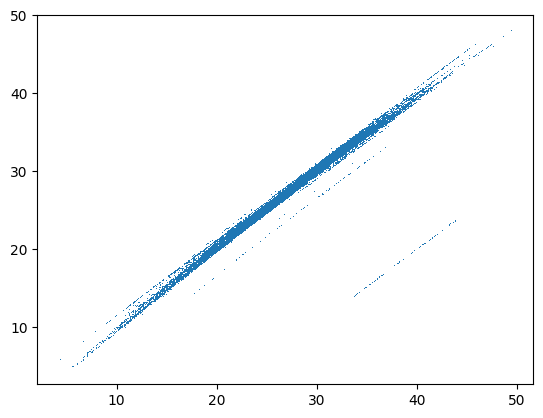

In [23]:
plt.plot(y_test,Yfit, ",")

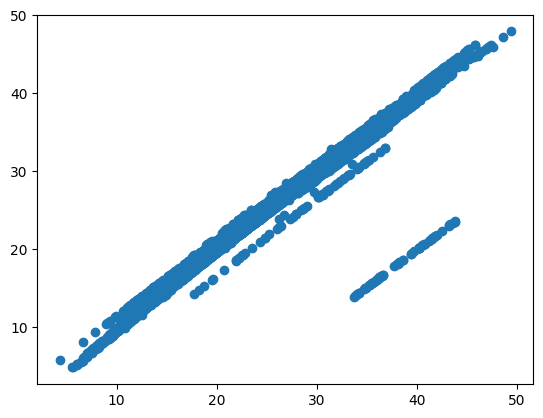

In [24]:
plt.scatter(y_test,Yfit)

In [25]:
#
# VALIDAZIONE
#
# utilizzo del modello addestrato e testato sul sensore Scardovari Mare per calcolare i valori di salinità del sensore Scardovari Interno, già noti
# calcoli di errore e valutazione precisione del modello
#
X_Val=DF_SI_2010_2020[ListaRegressori]
Y_Val_True=DF_SI_2010_2020[VariabileTarget]
Y_Val_Pred=model.predict(X_Val)

In [26]:
X_Val

,Temperatura,pH,Conducibilita_Specifica_a_25C
3864,22.70,8.38,32.00
3865,22.30,8.38,32.00
3866,21.90,8.38,32.00
3867,21.50,8.38,32.00
3868,21.20,8.39,32.00
...,...,...,...
159897,7.00,8.58,40.11
159898,7.04,8.58,40.16
159899,6.99,8.58,40.21
159900,6.98,8.58,40.24


In [27]:
Y_Val_True

,Salinita
3864,20.30
3865,20.30
3866,20.30
3867,20.30
3868,20.30
...,...
159897,25.32
159898,25.35
159899,25.38
159900,25.40


In [28]:
Y_Val_Pred

array([20.25854315, 20.24005776, 20.22157238, ..., 25.16854927,
       25.18868084, 25.23039783])

In [29]:
# calcolo della differenza fra valori predetti e valori effettivi già rilevati

Y_Err=Y_Val_Pred-Y_Val_True


In [30]:
print("differenza fra valori predetti e valori effettivi già rilevati (valori assoluti)\n")
Y_Err

differenza fra valori predetti e valori effettivi già rilevati (valori assoluti)



,Salinita
3864,-0.041457
3865,-0.059942
3866,-0.078428
3867,-0.096913
3868,-0.110767
...,...
159897,-0.219634
159898,-0.213463
159899,-0.211451
159900,-0.211319


In [31]:
print("differenza fra valori predetti e valori effettivi già rilevati (%)\n")

Y_Err_perc=((Y_Val_Pred-Y_Val_True)/Y_Val_True)*100
Y_Err_perc

differenza fra valori predetti e valori effettivi già rilevati (%)



,Salinita
3864,-0.204221
3865,-0.295282
3866,-0.386343
3867,-0.477404
3868,-0.545648
...,...
159897,-0.867434
159898,-0.842063
159899,-0.833139
159900,-0.831965


In [32]:
print("Indici di dispersione\n")
print("varianza campionaria -->", Y_Err.var())
print("deviazione standard campionaria -->", Y_Err.std())
print("\nprincipali indici descrittivi di centralità e dispersione \n(quelli relativi a media, deviazione standard, minimo, primo quartile, \nmediana, terzo quartile e massimo), \nunitamente al numero di osservazioni nella serie\n")
Y_Err.describe()

Indici di dispersione

varianza campionaria --> 0.21123667361956977
deviazione standard campionaria --> 0.459604910351891

principali indici descrittivi di centralità e dispersione 
(quelli relativi a media, deviazione standard, minimo, primo quartile, 
mediana, terzo quartile e massimo), 
unitamente al numero di osservazioni nella serie



,Salinita
count,121606.000000
mean,0.079159
std,0.459605
min,-3.009670
25%,-0.228887
50%,0.094111
75%,0.440016
max,1.406318


In [33]:
# OBIETTIVO 1 DELL'ESERCIZIO
#
# utilizzo del modello, fin qui addestrato e testato, per calcolare i valori di salinità nel dataset UC che non li contiene
#
# preparazione dataset UC
#
DS_UC_Interno=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/DS_UC_Interno_Adattato_test_dt.csv")
DF_UC_Interno = pd.DataFrame(DS_UC_Interno)


In [34]:
#ListaRegressori=["Temperatura","pH", "Conducibilita_Specifica_a_25C"]
xx=DF_UC_Interno[ListaRegressori]

In [35]:
xx

,Temperatura,pH,Conducibilita_Specifica_a_25C
0,5.72,9.10,23.00
1,5.84,9.10,24.56
2,6.09,9.10,25.34
3,6.38,8.97,35.09
4,6.50,8.97,35.09
...,...,...,...
266,3.13,9.10,22.22
267,3.25,9.10,22.81
268,3.53,9.10,23.20
269,3.78,9.10,23.20


In [36]:
# VariabileTarget="Salinita" (interamente da predire)
yy=DF_UC_Interno[VariabileTarget]

In [37]:
yy

,Salinita
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
266,NaN
267,NaN
268,NaN
269,NaN


In [38]:
# predizione valori di salinità per il Dataset UC - Irvine

yy=model.predict(xx)
print("array valori di salinità previsti per il dataset UC")
yy

array valori di salinità previsti per il dataset UC


array([  13.29648615,   14.37290416,   14.91989373,   21.62611133,
         21.63165695,   39.56778655,   15.21658951,   14.82121745,
         14.01667675,   12.80712661,   12.27908457,   11.07290097,
         10.78808389,   11.04101368,   10.62920903,    9.82129658,
          8.21894294,    8.88942725,    9.56684358,   10.52022899,
         11.73460473,   12.14668298,   11.4799632 ,   11.08921249,
         11.22253834,   11.36398889,   11.50319621,   12.31189613,
         14.99092567,   25.29279169,   46.69493042,   45.35495351,
         28.22601115,   26.75884242,   16.05566404,   13.25406402,
         11.91975901,   10.97931338,   11.51488638,   12.04616337,
         11.50194661,   11.2180538 ,   12.55109868,   11.3456403 ,
         10.94201727,   10.81977213,   11.10089213,   11.91388806,
         11.6480185 ,   10.8448642 ,   10.98360939,   10.98975395,
         10.99668597,   10.46587111,   10.73774843,   11.81462858,
         13.68990488,   16.89776393,   13.00945266,   11.11759

In [39]:
# dataset UC prima della integrazione
#
print("Dataset UC prima della integrazione")
DF_UC_Interno

Dataset UC prima della integrazione


,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2018 00:00:00,5.72,9.10,23.00,NaN
1,02/01/2018 00:00:00,5.84,9.10,24.56,NaN
2,03/01/2018 00:00:00,6.09,9.10,25.34,NaN
3,04/01/2018 00:00:00,6.38,8.97,35.09,NaN
4,05/01/2018 00:00:00,6.50,8.97,35.09,NaN
...,...,...,...,...,...
266,24/09/2018 00:00:00,3.13,9.10,22.22,NaN
267,25/09/2018 00:00:00,3.25,9.10,22.81,NaN
268,26/09/2018 00:00:00,3.53,9.10,23.20,NaN
269,27/09/2018 00:00:00,3.78,9.10,23.20,NaN


In [40]:
#
# integrazione del Dataset UC con i valori di salinità (mancanti in origine) calcolati con il modello di predizione

DF_UC_Interno["Salinita"]=model.predict(xx)

In [41]:
print("Dataset UC integrato")
DF_UC_Interno

Dataset UC integrato


,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2018 00:00:00,5.72,9.10,23.00,13.296486
1,02/01/2018 00:00:00,5.84,9.10,24.56,14.372904
2,03/01/2018 00:00:00,6.09,9.10,25.34,14.919894
3,04/01/2018 00:00:00,6.38,8.97,35.09,21.626111
4,05/01/2018 00:00:00,6.50,8.97,35.09,21.631657
...,...,...,...,...,...
266,24/09/2018 00:00:00,3.13,9.10,22.22,12.641357
267,25/09/2018 00:00:00,3.25,9.10,22.81,13.051912
268,26/09/2018 00:00:00,3.53,9.10,23.20,13.332570
269,27/09/2018 00:00:00,3.78,9.10,23.20,13.344123


In [42]:
# OBIETTIVO 2 DELL'ESERCIZIO
#
# predizione valori futuri di tutte le grandezze - 1 mese - 1-31/gennaio/2021
#
# Autoregressione lineare
#
#
# installazione modelli statistica

%pip install statsmodels --upgrade
#
# estrazione delle variabili per le quali calcolare valori futuri con autoregressione

AR_SM_Temperatura=DF_SM_2010_2020["Temperatura"]
AR_SM_pH=DF_SM_2010_2020["pH"]
AR_SM_Conducibilita_Specifica_a_25C=DF_SM_2010_2020["Conducibilita_Specifica_a_25C"]
AR_SM_Salinita=DF_SM_2010_2020["Salinita"]


Scatter plot serie storica 'Temperatura'


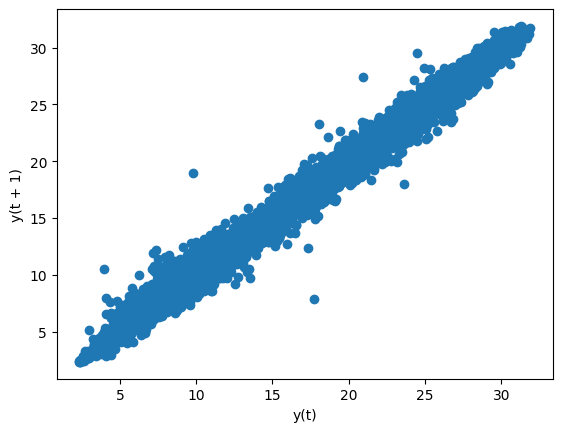


Funzione di autocorrelazione, con i 'lags' sull'asse x e le correlazioni sull'asse y

744 righe del DataFrame pari a 31 giorni x 24 rilevazioni


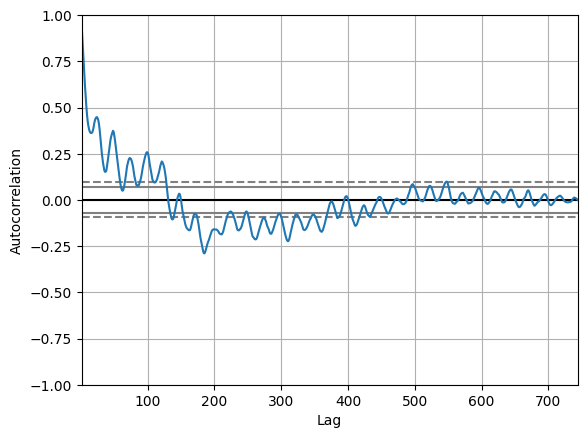


Coefficienti di Pearson
744 righe del DataFrame pari a 31 giorni x 24 rilevazioni


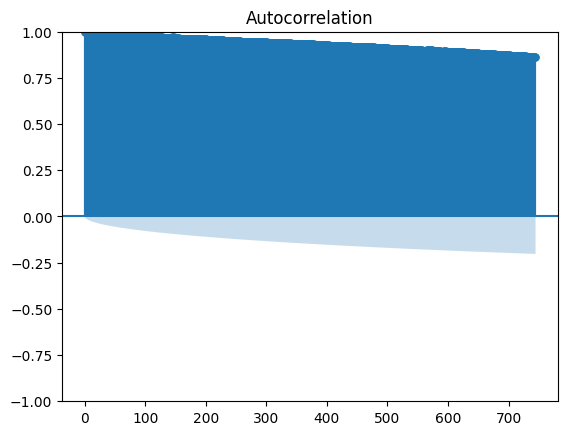

In [43]:
# Per ogni variabile viene effettuato:
#
# a) un controllo visivo per vedere se esiste un'autocorrelazione nella serie storica con la funzione lag_plot ()
#
# b) Calcolo del coefficiente di relazione di Pearson (covarianza di due serie di valori diviso per il prodotto delle loro deviazioni standard)
#    un numero per riassumere come sono correlate due serie di valori
#    compreso tra -1 (correlate negativamente) e +1 (correlate positivamente)
#    valori vicini allo zero indicano una bassa correlazione
#    valori alti superiori a 0,5 o inferiori a -0,5 indicano una correlazione elevata
#    La correlazione può essere calcolata facilmente utilizzando la funzione corr() sul DataFrame del dataset "laggato"
#
#
from pandas.plotting import lag_plot
from matplotlib import pyplot
lag_plot(AR_SM_Temperatura)
print("Scatter plot serie storica \'Temperatura\'")
pyplot.show()
# Plot della funzione di autocorrelazione, i "lags" sull'asse x e le correlazioni sull'asse y.
print("\nFunzione di autocorrelazione, con i \'lags\' sull'asse x e le correlazioni sull'asse y")
print("\n744 righe del DataFrame pari a 31 giorni x 24 rilevazioni")
pd.plotting.autocorrelation_plot(AR_SM_Temperatura.tail(744))
# <AxesSubplot:title={'center':'width'}, xlabel='Lag', ylabel='Autocorrelazione'>
pyplot.show()
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
# Plot della funzione di autocorrelazione, i "lags" sull'asse x e le correlazioni sull'asse y.
print("\nCoefficienti di Pearson\n744 righe del DataFrame pari a 31 giorni x 24 rilevazioni")
plot_acf(AR_SM_Temperatura, lags=744)
pyplot.show()




Coefficienti di Pearson
24 righe del DataFrame pari a 1 giorno x 24 rilevazioni


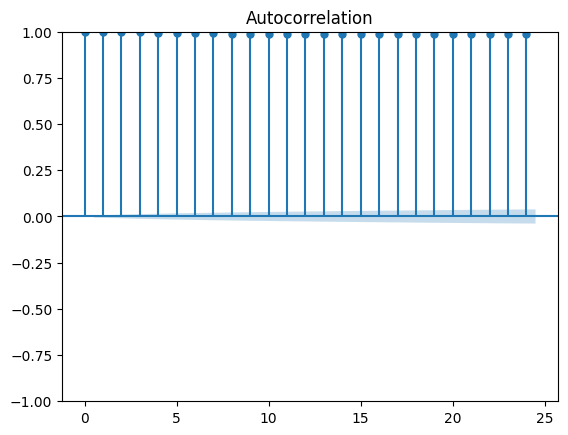

In [44]:
# Plot della funzione di autocorrelazione, i "lags" sull'asse x e le correlazioni sull'asse y.
print("\nCoefficienti di Pearson\n24 righe del DataFrame pari a 1 giorno x 24 rilevazioni")
plot_acf(AR_SM_Temperatura, lags=24)
pyplot.show()

In [45]:
Verifica_AR_SM_Temperatura = pd.concat([AR_SM_Temperatura.shift(1), AR_SM_Temperatura], axis=1)
Verifica_AR_SM_Temperatura.columns = ['t-1', 't+1']
Risultato_Verifica_AR_SM_Temperatura = Verifica_AR_SM_Temperatura.corr()
print("\nCoefficienti di Pearson\n", Risultato_Verifica_AR_SM_Temperatura)


Coefficienti di Pearson
           t-1       t+1
t-1  1.000000  0.999026
t+1  0.999026  1.000000


Scatter plot serie storica 'pH'


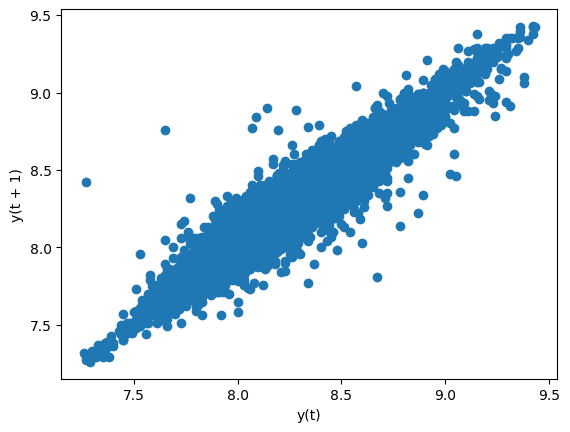

          t-1       t+1
t-1  1.000000  0.985235
t+1  0.985235  1.000000


In [46]:
#
# analoga verifica per la variabile pH
#
lag_plot(AR_SM_pH)
print("Scatter plot serie storica \'pH\'")
pyplot.show()
Verifica_AR_SM_pH = pd.concat([AR_SM_pH.shift(1), AR_SM_pH], axis=1)
Verifica_AR_SM_pH.columns = ['t-1', 't+1']
Risultato_Verifica_AR_SM_pH = Verifica_AR_SM_pH.corr()
print(Risultato_Verifica_AR_SM_pH)

Scatter plot serie storica 'Conducibilità specifica a 25° C'


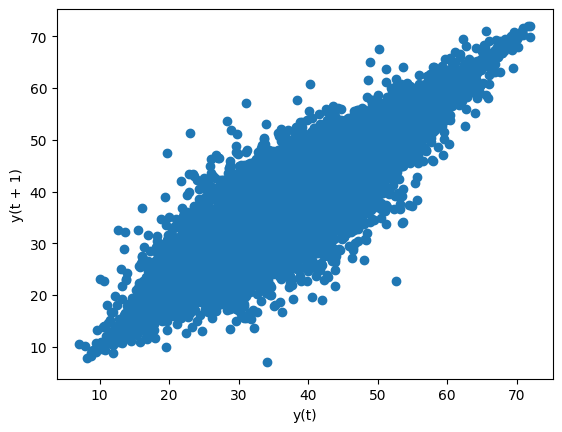

          t-1       t+1
t-1  1.000000  0.965775
t+1  0.965775  1.000000


In [47]:
#
# analoga verifica per la variabile Conducibilita_Specifica_a_25C
#
lag_plot(AR_SM_Conducibilita_Specifica_a_25C)
print("Scatter plot serie storica \'Conducibilità specifica a 25° C\'")
pyplot.show()
Verifica_AR_SM_Conducibilita_Specifica_a_25C = pd.concat([AR_SM_Conducibilita_Specifica_a_25C.shift(1), AR_SM_Conducibilita_Specifica_a_25C], axis=1)
Verifica_AR_SM_Conducibilita_Specifica_a_25C.columns = ['t-1', 't+1']
Risultato_Verifica_AR_SM_Conducibilita_Specifica_a_25C = Verifica_AR_SM_Conducibilita_Specifica_a_25C.corr()
print(Risultato_Verifica_AR_SM_Conducibilita_Specifica_a_25C)


Scatter plot serie storica 'Salinità'


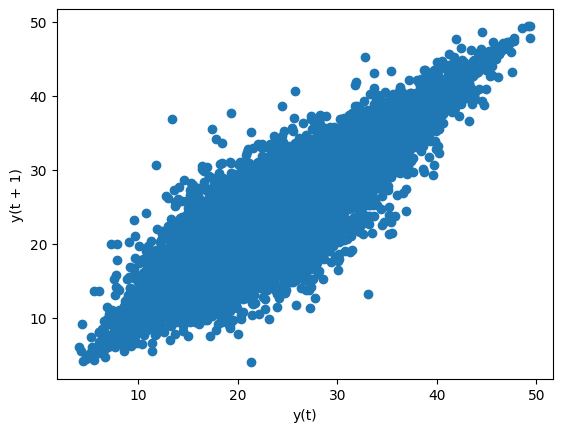

          t-1       t+1
t-1  1.000000  0.966615
t+1  0.966615  1.000000


In [48]:
#
# analoga verifica per la variabile Salinita
#
lag_plot(AR_SM_Salinita)
print("Scatter plot serie storica \'Salinità\'")
pyplot.show()
Verifica_AR_SM_Salinita = pd.concat([AR_SM_Salinita.shift(1), AR_SM_Salinita], axis=1)
Verifica_AR_SM_Salinita.columns = ['t-1', 't+1']
Risultato_Verifica_AR_SM_Salinita = Verifica_AR_SM_Salinita.corr()
print(Risultato_Verifica_AR_SM_Salinita)

In [49]:
#
# Tentativo n. 1
#
# utilizzo della funzione Autoreg per predire i valori del mese di gennaio 2021 dal Dataset decennale con un lag di 744 righe (31 giorni x 24 rilevazioni)
#

from statsmodels.tsa.ar_model import AutoReg
from random import random

In [50]:
# trasformazione colonne DataFrame --> numpy arrays come richiesto dal modello di autoregressione

Temperatura=np.array(AR_SM_Temperatura)
pH=np.array(AR_SM_pH)
Conducibilita_Specifica_a_25C=np.array(AR_SM_Conducibilita_Specifica_a_25C)
Salinita = np.array(AR_SM_Salinita)

In [51]:
Temperatura

array([9.8 , 9.79, 9.76, ..., 8.24, 8.23, 8.23])

In [52]:
# modello di autoregressione per 744 valori (31 giorni x 24 rilevazioni)

model = AutoReg(Temperatura, lags=744)

model_fit = model.fit()

In [53]:
# predizione Temperatura 31 giorni x 24 rilevazioni

TemperaturaY = model_fit.predict(len(Temperatura), len(Temperatura)+744)
#TemperaturaY = model_fit.predict(len(Temperatura), len(Temperatura))

print(TemperaturaY)

[ 8.19351761  8.21131316  8.17106481  8.26436689  8.46998754  8.75631007
  9.11085132  9.4391844   9.66926297  9.87323692  9.93319541  9.91038176
  9.83331085  9.77481958  9.71031605  9.60626579  9.51698725  9.43467154
  9.38441812  9.29347896  9.17453067  9.10763753  9.01737337  8.95426808
  8.90743826  8.91775381  8.9959927   9.11494988  9.37190395  9.72242457
  9.98418399 10.19182677 10.3372098  10.43947165 10.49898762 10.49425248
 10.45840195 10.39970249 10.27415534 10.09755807  9.93343494  9.70975446
  9.51761721  9.37562089  9.16613664  9.00138158  8.7552017   8.63316454
  8.6107493   8.60265823  8.6016479   8.63467327  8.66381418  8.77572166
  9.01654722  9.31807101  9.61230509  9.83366445  9.97442991 10.01431393
 10.06015096 10.04868066  9.96839098  9.93000955  9.84093405  9.73646857
  9.65410868  9.52755672  9.42415577  9.34567483  9.22765745  9.21513402
  9.18010408  9.12022822  9.12890903  9.20324909  9.23902504  9.39340106
  9.60819227  9.79399638  9.98774968 10.13593367 10

In [54]:
print(TemperaturaY)

[ 8.19351761  8.21131316  8.17106481  8.26436689  8.46998754  8.75631007
  9.11085132  9.4391844   9.66926297  9.87323692  9.93319541  9.91038176
  9.83331085  9.77481958  9.71031605  9.60626579  9.51698725  9.43467154
  9.38441812  9.29347896  9.17453067  9.10763753  9.01737337  8.95426808
  8.90743826  8.91775381  8.9959927   9.11494988  9.37190395  9.72242457
  9.98418399 10.19182677 10.3372098  10.43947165 10.49898762 10.49425248
 10.45840195 10.39970249 10.27415534 10.09755807  9.93343494  9.70975446
  9.51761721  9.37562089  9.16613664  9.00138158  8.7552017   8.63316454
  8.6107493   8.60265823  8.6016479   8.63467327  8.66381418  8.77572166
  9.01654722  9.31807101  9.61230509  9.83366445  9.97442991 10.01431393
 10.06015096 10.04868066  9.96839098  9.93000955  9.84093405  9.73646857
  9.65410868  9.52755672  9.42415577  9.34567483  9.22765745  9.21513402
  9.18010408  9.12022822  9.12890903  9.20324909  9.23902504  9.39340106
  9.60819227  9.79399638  9.98774968 10.13593367 10

In [55]:
pH

array([8.31, 8.35, 8.34, ..., 8.31, 8.31, 8.32])

In [56]:
# modello di autoregressione per 744 valori (31 giorni x 24 rilevazioni)

model = AutoReg(pH, lags=744)

model_fit = model.fit()

In [57]:
# predizione pH 31 giorni x 24 rilevazioni

pHY = model_fit.predict(len(pH), len(pH)+744)

print(pHY)

[8.31779982 8.316901   8.31730755 8.3161882  8.3171531  8.31482568
 8.31178803 8.31172324 8.31224879 8.31022242 8.30877199 8.31033572
 8.31006094 8.30935614 8.30906429 8.30747437 8.30601569 8.30564959
 8.30362482 8.29973934 8.2974262  8.29494934 8.29478672 8.29448527
 8.29163083 8.29166449 8.2917483  8.29090698 8.29161211 8.29628782
 8.29563472 8.29665785 8.29492582 8.29568903 8.29826797 8.29678622
 8.29671396 8.29826657 8.2975432  8.29661481 8.29763458 8.29914299
 8.30202565 8.30575711 8.30621087 8.30559138 8.30618424 8.30607868
 8.30611925 8.30636566 8.30595351 8.30664397 8.30664956 8.30191444
 8.29976462 8.29959841 8.29857294 8.29713208 8.29714167 8.29913187
 8.30105447 8.30130378 8.3036724  8.30218763 8.3004071  8.29923291
 8.29630599 8.29143564 8.28869815 8.28697761 8.28632641 8.28482131
 8.28252602 8.28439156 8.28299986 8.27896304 8.27857758 8.27951211
 8.28237355 8.28322723 8.2843122  8.28579249 8.28888838 8.29179355
 8.29016348 8.29185974 8.2930026  8.29460875 8.29351656 8.2952

In [58]:
Conducibilita_Specifica_a_25C=np.array(AR_SM_Conducibilita_Specifica_a_25C)

In [59]:
# modello di autoregressione per 744 valori (31 giorni x 24 rilevazioni)

model = AutoReg(Conducibilita_Specifica_a_25C, lags=744)

model_fit = model.fit()

In [60]:
# predizione Conducibilita_Specifica_a_25C 31 giorni x 24 rilevazioni

Conducibilita_Specifica_a_25CY = model_fit.predict(len(Conducibilita_Specifica_a_25C), len(Conducibilita_Specifica_a_25C)+744)

print(Conducibilita_Specifica_a_25CY)

[41.71424536 41.53662375 41.47078365 41.20506028 41.22415153 41.75428356
 42.34683263 42.5759544  42.83907745 42.97741785 42.92222768 42.58927161
 42.31469649 42.4588748  42.46187714 42.11211418 41.73666647 41.91320726
 42.0574411  42.53742156 42.35566976 41.86150768 41.63205348 41.81346648
 41.69760289 41.92281957 42.09669752 42.25295323 42.76148478 43.73531599
 44.29403771 44.43287175 44.43945415 44.58073826 45.03115933 45.20269055
 45.12420729 45.21073388 44.80323184 44.133048   43.67348116 43.23876278
 43.33885022 43.30340288 43.05677729 43.01673111 42.29607803 41.92676827
 42.03214869 41.94302596 41.96938703 41.58496901 41.25412864 41.44465467
 41.80102939 42.08271675 42.63587135 42.80994258 42.86659227 42.676682
 42.9340895  42.71126522 42.55626385 42.78033572 42.91904212 42.69539137
 42.5730206  42.50724185 42.4293675  42.26931379 41.76717679 41.54113592
 41.54421061 41.50634379 41.5142012  41.72298863 41.7295795  41.64648614
 42.24982532 42.60822629 42.8773166  43.07447025 42.9

In [61]:
Salinita

array([23.61, 23.65, 22.75, ..., 26.43, 26.35, 26.45])

In [62]:
# modello di autoregressione per 744 valori (31 giorni x 24 rilevazioni)

model = AutoReg(Salinita, lags=744)

model_fit = model.fit()

In [63]:
# predizione Salinita 31 giorni x 24 rilevazioni

SalinitaY = model_fit.predict(len(Salinita), len(Salinita)+744)

print(SalinitaY)

[26.42640779 26.2854412  26.23598258 26.08215763 26.11462795 26.50022414
 26.96720658 27.13985734 27.33595264 27.43414418 27.40826056 27.17702366
 27.00951255 27.11084753 27.10680605 26.88856891 26.6023979  26.7233067
 26.80482045 27.15820529 27.02144882 26.69198014 26.52026676 26.66439207
 26.56750011 26.72259753 26.84863358 26.94169309 27.34752086 28.05035614
 28.47778875 28.60100701 28.61243674 28.73177399 29.06872955 29.1727704
 29.15103453 29.21456262 28.93459078 28.4687826  28.12306493 27.80114981
 27.85948151 27.80272589 27.5897918  27.55168305 27.0505584  26.76867729
 26.82166296 26.74954775 26.76859643 26.50845476 26.28881115 26.44625371
 26.68825517 26.91729504 27.31700953 27.44008013 27.51503044 27.37354877
 27.54111014 27.38814781 27.28445406 27.44875558 27.53219279 27.3742519
 27.2615131  27.21480254 27.1535548  27.05214973 26.70266582 26.54685575
 26.55150089 26.52114913 26.53589737 26.68064247 26.68406298 26.67779436
 27.13262726 27.35784486 27.56471238 27.72575814 27.66

In [64]:
# caricamento Dataset gennaio 2021 vuoto e conversione in DataFrame

DS_SM_01_2021=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/DS_Scardovari_Mare_01_2021_dt.csv")
DF_SM_01_2021 = pd.DataFrame(DS_SM_01_2021)
DF_SM_01_2021

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2021 00:00,NaN,NaN,NaN,NaN
1,01/01/2021 01:00,NaN,NaN,NaN,NaN
2,01/01/2021 02:00,NaN,NaN,NaN,NaN
3,01/01/2021 03:00,NaN,NaN,NaN,NaN
4,01/01/2021 04:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
739,31/01/2021 19:00,NaN,NaN,NaN,NaN
740,31/01/2021 20:00,NaN,NaN,NaN,NaN
741,31/01/2021 21:00,NaN,NaN,NaN,NaN
742,31/01/2021 22:00,NaN,NaN,NaN,NaN


In [65]:
# conversione numpy arrays delle singole variabili in DataFrames

DF_Temperatura_Y=pd.DataFrame(TemperaturaY,columns=["Temperatura"])
DF_pH_Y=pd.DataFrame(pHY,columns=["pH"])
DF_Conducibilita_Specifica_a_25C_Y=pd.DataFrame(Conducibilita_Specifica_a_25CY,columns=["Conducibilita_Specifica_a_25CY"])
DF_Salinita_Y=pd.DataFrame(SalinitaY,columns=["Salinita"])


In [66]:
DF_Temperatura_Y

,Temperatura
0,8.193518
1,8.211313
2,8.171065
3,8.264367
4,8.469988
...,...
740,10.209644
741,10.168794
742,10.137625
743,10.114268


In [67]:
DF_pH_Y

,pH
0,8.317800
1,8.316901
2,8.317308
3,8.316188
4,8.317153
...,...
740,8.279641
741,8.278960
742,8.278288
743,8.277978


In [68]:
DF_Conducibilita_Specifica_a_25C_Y

,Conducibilita_Specifica_a_25CY
0,41.714245
1,41.536624
2,41.470784
3,41.205060
4,41.224152
...,...
740,41.872938
741,41.769763
742,41.685254
743,41.668158


In [69]:
DF_Salinita_Y

,Salinita
0,26.426408
1,26.285441
2,26.235983
3,26.082158
4,26.114628
...,...
740,26.732671
741,26.655604
742,26.594831
743,26.579550


In [70]:
# caricamento delle colonne delle variabili ricavate per autoregressione nel DataFrame gennaio 2021

DF_SM_01_2021["Temperatura"] = DF_Temperatura_Y
DF_SM_01_2021["pH"] = DF_pH_Y
DF_SM_01_2021["Conducibilita_Specifica_a_25C"] = DF_Conducibilita_Specifica_a_25C_Y
DF_SM_01_2021["Salinita"] = DF_Salinita_Y


In [71]:
# DataFrame gennaio 2021 ricomposto con le variabili predette con autoregressione

DF_SM_01_2021

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2021 00:00,8.193518,8.317800,41.714245,26.426408
1,01/01/2021 01:00,8.211313,8.316901,41.536624,26.285441
2,01/01/2021 02:00,8.171065,8.317308,41.470784,26.235983
3,01/01/2021 03:00,8.264367,8.316188,41.205060,26.082158
4,01/01/2021 04:00,8.469988,8.317153,41.224152,26.114628
...,...,...,...,...,...
739,31/01/2021 19:00,10.253372,8.280472,41.944005,26.782456
740,31/01/2021 20:00,10.209644,8.279641,41.872938,26.732671
741,31/01/2021 21:00,10.168794,8.278960,41.769763,26.655604
742,31/01/2021 22:00,10.137625,8.278288,41.685254,26.594831


In [72]:
# esportazione DataFrame, ricavato per autoregressione, in formato csv

DF_SM_01_2021.to_csv(r'/content/drive/MyDrive/Colab/PW_Corso_DS/DF_SM_01_2021.csv', index=False)

In [73]:
# caricamento valori Dataset Scardovari Mare gennaio 2021 - VERI (effettivamente rilevati dai sensori)
#
DS_SM_01_2021_true=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/SCARDOVARI_MARE_01_2021_true_dt.csv")

In [74]:
#
# valori di gennaio 2021 rilevati dai sensori
#
DS_SM_01_2021_true

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2021 00:00:00,9.06,8.29,32.42,20.02
1,01/01/2021 01:00:00,8.32,8.30,28.97,17.64
2,01/01/2021 02:00:00,8.08,8.29,27.24,16.46
3,01/01/2021 03:00:00,9.23,8.28,34.87,21.72
4,01/01/2021 04:00:00,9.46,8.28,36.38,22.78
...,...,...,...,...,...
739,31/01/2021 19:00:00,6.89,8.51,41.98,26.61
740,31/01/2021 20:00:00,6.98,8.47,39.02,24.56
741,31/01/2021 21:00:00,7.37,8.44,39.39,24.84
742,31/01/2021 22:00:00,8.25,8.39,43.39,27.70


In [75]:
DF_SM_01_2021_true = pd.DataFrame(DS_SM_01_2021_true)

In [76]:
DF_SM_01_2021_true

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2021 00:00:00,9.06,8.29,32.42,20.02
1,01/01/2021 01:00:00,8.32,8.30,28.97,17.64
2,01/01/2021 02:00:00,8.08,8.29,27.24,16.46
3,01/01/2021 03:00:00,9.23,8.28,34.87,21.72
4,01/01/2021 04:00:00,9.46,8.28,36.38,22.78
...,...,...,...,...,...
739,31/01/2021 19:00:00,6.89,8.51,41.98,26.61
740,31/01/2021 20:00:00,6.98,8.47,39.02,24.56
741,31/01/2021 21:00:00,7.37,8.44,39.39,24.84
742,31/01/2021 22:00:00,8.25,8.39,43.39,27.70


In [77]:
#
# tabella di comparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg
#
print("\nComparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg")
print("per ciascuna variabile le colonne \'self\' contengono i valori reali, le colonne \'other\' valori predetti\n")
DF_SM_01_2021_true.compare( DF_SM_01_2021 , align_axis=1 , keep_shape=True , keep_equal=True )


Comparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg
per ciascuna variabile le colonne 'self' contengono i valori reali, le colonne 'other' valori predetti



Giorno_Orario                   Temperatura               pH  \
                    self             other        self      other  self   
0    01/01/2021 00:00:00  01/01/2021 00:00        9.06   8.193518  8.29   
1    01/01/2021 01:00:00  01/01/2021 01:00        8.32   8.211313  8.30   
2    01/01/2021 02:00:00  01/01/2021 02:00        8.08   8.171065  8.29   
3    01/01/2021 03:00:00  01/01/2021 03:00        9.23   8.264367  8.28   
4    01/01/2021 04:00:00  01/01/2021 04:00        9.46   8.469988  8.28   
..                   ...               ...         ...        ...   ...   
739  31/01/2021 19:00:00  31/01/2021 19:00        6.89  10.253372  8.51   
740  31/01/2021 20:00:00  31/01/2021 20:00        6.98  10.209644  8.47   
741  31/01/2021 21:00:00  31/01/2021 21:00        7.37  10.168794  8.44   
742  31/01/2021 22:00:00  31/01/2021 22:00        8.25  10.137625  8.39   
743  31/01/2021 23:00:00  31/01/2021 23:00        7.85  10.114268  8.42   

              Conducibilita_Specifica_a_25C            Salinita             
        other                          self      other     self      other  
0    8.317800                         32.42  41.714245    20.02  26.426408  
1    8.316901                         28.97  41.536624    17.64  26.285441  
2    8.317308                         27.24  41.470784    16.46  26.235983  
3    8.316188                         34.87  41.205060    21.72  26.082158  
4    8.317153                         36.38  41.224152    22.78  26.114628  
..        ...                           ...        ...      ...        ...  
739  8.280472                         41.98  41.944005    26.61  26.782456  
740  8.279641                         39.02  41.872938    24.56  26.732671  
741  8.278960                         39.39  41.769763    24.84  26.655604  
742  8.278288                         43.39  41.685254    27.70  26.594831  
743  8.277978                         43.15  41.668158    27.51  26.579550  

[744 rows x 10 columns]

In [79]:
#
# visualizzazione valori reali e valori predetti a confronto - 7 giorni
#

plt.style.use('seaborn-whitegrid')
plt.plot(DF_SM_01_2021_true["Salinita"].head(168))
plt.plot(DF_SM_01_2021["Salinita"].head(168))
plt.ylabel("Salinita\'")
plt.xlabel("rilevazioni ad ogni ora")
plt.show()


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

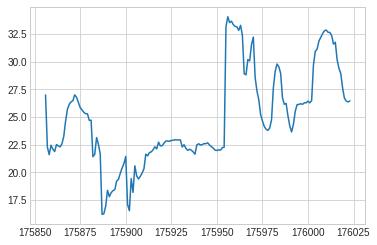

In [ ]:
#
# visualizzazione serie storica - ultimi 7 giorni
#
plt.plot(DF_SM_2010_2020["Salinita"].tail(168))

In [ ]:
#
# RISULTATO INSODDISFACENTE nonostante Coefficienti di Pearson INCORAGGIANTI
#
print("\nRISULTATO INSODDISFACENTE nonostante Coefficienti di Pearson INCORAGGIANTI !!!\n")


RISULTATO INSODDISFACENTE nonostante Coefficienti di Pearson INCORAGGIANTI !!!



In [ ]:
#
# Tentativo n. 2
#
# addestramento di un modello di autoregressione per ciascuna variabile
# per predire i valori del mese di gennaio 2021 dal Dataset decennale
# testando diversi valori di lag
#
from math import sqrt

# load dataset
# AR_SM_Temperatura
# split dataset
AR_SM_Temperatura_X = AR_SM_Temperatura.values
print("numero righe nel dataset: ",len(AR_SM_Temperatura_X))
print("\nle righe scelte non sono casuali ma volutamente consecutive\n")
print("training dataset - riga iniziale: ",len(AR_SM_Temperatura_X)-8928+1," riga finale:",len(AR_SM_Temperatura_X)-8928+7440)
print("test     dataset - riga iniziale: ",len(AR_SM_Temperatura_X)-8928+7440+1," riga finale:",len(AR_SM_Temperatura_X))

AR_SM_Temperatura_train = AR_SM_Temperatura_X[len(AR_SM_Temperatura_X)-8928+1:len(AR_SM_Temperatura_X)-8928+7440+1]
AR_SM_Temperatura_test = AR_SM_Temperatura_X[len(AR_SM_Temperatura_X)-8928+7440:]

print("numero righe nel training dataset",len(AR_SM_Temperatura_train))
print("numero righe nel test dataset ",len(AR_SM_Temperatura_test))

# addestramento autoregressione
model = AutoReg(AR_SM_Temperatura_train, lags=1447)
model_fit = model.fit()
#print('Coefficienti: %s' % model_fit.params)

numero righe nel dataset:  120222

le righe scelte non sono casuali ma volutamente consecutive

training dataset - riga iniziale:  111295  riga finale: 118734
test     dataset - riga iniziale:  118735  riga finale: 120222
numero righe nel training dataset 7440
numero righe nel test dataset  1488


Predizione Temperatura a 3 giorni

Test RMSE: 4.206




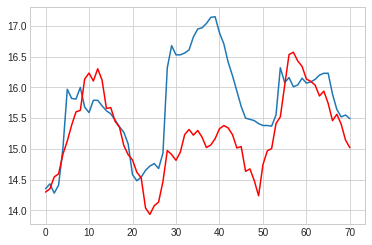

In [ ]:
#
# predizione Temperatura
#
AR_SM_Temperatura_predictions = model_fit.predict(start=len(AR_SM_Temperatura_train), end=len(AR_SM_Temperatura_train)+len(AR_SM_Temperatura_test)-1, dynamic=False)
#for i in range(len(AR_SM_Temperatura_predictions)):
#	print('predicted=%f, expected=%f' % (AR_SM_Temperatura_predictions[i], AR_SM_Temperatura_test[i]))
AR_SM_Temperatura_rmse = sqrt(mean_squared_error(AR_SM_Temperatura_test, AR_SM_Temperatura_predictions))
print("Predizione Temperatura a 3 giorni\n")
print('Test RMSE: %.3f' % AR_SM_Temperatura_rmse)
print('\n')
# plot results
pyplot.plot(AR_SM_Temperatura_test[1:72])
pyplot.plot(AR_SM_Temperatura_predictions[1:72], color='red')
pyplot.show()

In [ ]:
#
# AD UN PRIMO RISCONTRO VISIVO APPARE PIU' ATTENDIBILE LA PREDIZIONE AD 1 GIORNO ( PARI A 24 RILEVAZIONI)
#
# SI PROSEGUE CON LE ALTRE VARIABILI
#

In [ ]:
# load dataset
# AR_SM_pH
# split dataset
AR_SM_pH_X = AR_SM_pH.values
print("numero righe nel dataset: ",len(AR_SM_pH_X))
print("training dataset - riga iniziale: ",len(AR_SM_pH_X)-8928+1," riga finale:",len(AR_SM_pH_X)-8928+7440)
print("test     dataset - riga iniziale: ",len(AR_SM_pH_X)-8928+7440+1," riga finale:",len(AR_SM_pH_X))

AR_SM_pH_train = AR_SM_pH_X[len(AR_SM_pH_X)-8928+1:len(AR_SM_pH_X)-8928+7440+1]
AR_SM_pH_test = AR_SM_pH_X[len(AR_SM_pH_X)-8928+7440:]
print("numero righe nel training dataset",len(AR_SM_pH_train))
print("numero righe nel test dataset ",len(AR_SM_pH_test))

# addestramento autoregressione
model = AutoReg(AR_SM_pH_train, lags=1447)
model_fit = model.fit()
#print('Coefficienti: %s' % model_fit.params)

numero righe nel dataset:  120222
training dataset - riga iniziale:  111295  riga finale: 118734
test     dataset - riga iniziale:  118735  riga finale: 120222
numero righe nel training dataset 7440
numero righe nel test dataset  1488


Test RMSE: 0.040





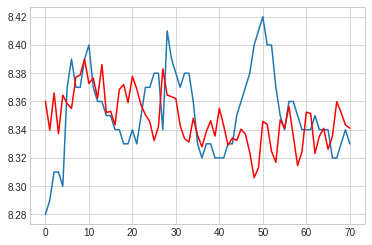

In [ ]:
#
# predizione pH
#
AR_SM_pH_predictions = model_fit.predict(start=len(AR_SM_pH_train)+4, end=len(AR_SM_pH_train)+len(AR_SM_pH_test)+3, dynamic=False)
#for i in range(len(AR_SM_pH_predictions)):
#	print('predicted=%f, expected=%f' % (AR_SM_pH_predictions[i], AR_SM_pH_test[i]))
AR_SM_pH_rmse = sqrt(mean_squared_error(AR_SM_pH_test, AR_SM_pH_predictions))
print('Test RMSE: %.3f' % AR_SM_pH_rmse)
print('\n\n')
# plot results
pyplot.plot(AR_SM_pH_test[1:72])
pyplot.plot(AR_SM_pH_predictions[1:72], color='red')
pyplot.show()

In [ ]:
# load dataset
# AR_SM_Conducibilita_Specifica_a_25C
# split dataset
AR_SM_Conducibilita_Specifica_a_25C_X = AR_SM_Conducibilita_Specifica_a_25C.values
print("numero righe nel dataset: ",len(AR_SM_Conducibilita_Specifica_a_25C_X))
print("training dataset - riga iniziale: ",len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+1," riga finale:",len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+7440)
print("test     dataset - riga iniziale: ",len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+7440+1," riga finale:",len(AR_SM_Conducibilita_Specifica_a_25C_X))

AR_SM_Conducibilita_Specifica_a_25C_train = AR_SM_Conducibilita_Specifica_a_25C_X[len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+1:len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+7440+1]
AR_SM_Conducibilita_Specifica_a_25C_test = AR_SM_Conducibilita_Specifica_a_25C_X[len(AR_SM_Conducibilita_Specifica_a_25C_X)-8928+7440:]
print("numero righe nel training dataset",len(AR_SM_Conducibilita_Specifica_a_25C_train))
print("numero righe nel test dataset ",len(AR_SM_Conducibilita_Specifica_a_25C_test))

# addestramento autoregressione
model = AutoReg(AR_SM_Conducibilita_Specifica_a_25C_train, lags=1447)
model_fit = model.fit()
#print('Coefficienti: %s' % model_fit.params)

numero righe nel dataset:  120222
training dataset - riga iniziale:  111295  riga finale: 118734
test     dataset - riga iniziale:  118735  riga finale: 120222
numero righe nel training dataset 7440
numero righe nel test dataset  1488


Test RMSE: 7.724





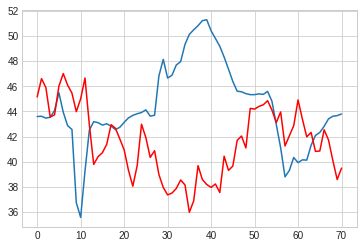

In [ ]:
#
# predizione Conducibilita_Specifica_a_25C
#
AR_SM_Conducibilita_Specifica_a_25C_predictions = model_fit.predict(start=len(AR_SM_Conducibilita_Specifica_a_25C_train)+4, end=len(AR_SM_Conducibilita_Specifica_a_25C_train)+len(AR_SM_Conducibilita_Specifica_a_25C_test)+3, dynamic=False)
#for i in range(len(AR_SM_Conducibilita_Specifica_a_25C_predictions)):
#	print('predicted=%f, expected=%f' % (AR_SM_Conducibilita_Specifica_a_25C_predictions[i], AR_SM_Conducibilita_Specifica_a_25C_test[i]))
AR_SM_Conducibilita_Specifica_a_25C_rmse = sqrt(mean_squared_error(AR_SM_Conducibilita_Specifica_a_25C_test, AR_SM_Conducibilita_Specifica_a_25C_predictions))
print('Test RMSE: %.3f' % AR_SM_Conducibilita_Specifica_a_25C_rmse)
print('\n\n')
# plot results
pyplot.plot(AR_SM_Conducibilita_Specifica_a_25C_test[1:72])
pyplot.plot(AR_SM_Conducibilita_Specifica_a_25C_predictions[1:72], color='red')
pyplot.show()

In [ ]:
# load dataset
# AR_SM_Salinita
# split dataset
AR_SM_Salinita_X = AR_SM_Salinita.values
print("numero righe nel dataset: ",len(AR_SM_Salinita_X))
print("training dataset - riga iniziale: ",len(AR_SM_Salinita_X)-8928+1," riga finale:",len(AR_SM_Salinita_X)-8928+7440)
print("test     dataset - riga iniziale: ",len(AR_SM_Salinita_X)-8928+7440+1," riga finale:",len(AR_SM_Salinita_X))

AR_SM_Salinita_train = AR_SM_Salinita_X[len(AR_SM_Salinita_X)-8928+1:len(AR_SM_Salinita_X)-8928+7440+1]
AR_SM_Salinita_test = AR_SM_Salinita_X[len(AR_SM_Salinita_X)-8928+7440:]
print("numero righe nel training dataset",len(AR_SM_Salinita_train))
print("numero righe nel test dataset ",len(AR_SM_Salinita_test))

# addestramento autoregressione
model = AutoReg(AR_SM_Salinita_train, lags=1447)
model_fit = model.fit()
#print('Coefficienti: %s' % model_fit.params)

numero righe nel dataset:  120222
training dataset - riga iniziale:  111295  riga finale: 118734
test     dataset - riga iniziale:  118735  riga finale: 120222
numero righe nel training dataset 7440
numero righe nel test dataset  1488


Test RMSE: 5.570





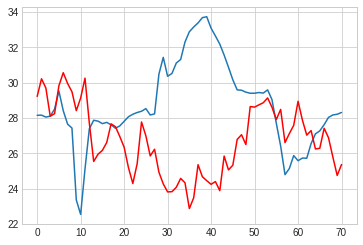

In [ ]:
#
# predizione Salinita
#
AR_SM_Salinita_predictions = model_fit.predict(start=len(AR_SM_Salinita_train)+4, end=len(AR_SM_Salinita_train)+len(AR_SM_Salinita_test)+3, dynamic=False)
#for i in range(len(AR_SM_Salinita_predictions)):
#	print('predicted=%f, expected=%f' % (AR_SM_Salinita_predictions[i], AR_SM_Salinita_test[i]))
AR_SM_Salinita_rmse = sqrt(mean_squared_error(AR_SM_Salinita_test, AR_SM_Salinita_predictions))
print('Test RMSE: %.3f' % AR_SM_Salinita_rmse)
print('\n\n')
# plot results
pyplot.plot(AR_SM_Salinita_test[1:72])
pyplot.plot(AR_SM_Salinita_predictions[1:72], color='red')
pyplot.show()

In [ ]:
#
# caricamento del Dataset vuoto di gennaio 2021 per realizzare un nuovo Dataframe da riempire con i valori predetti con il tentativo n.2
#

DS_SM_01_2021_N2=pd.read_csv("/content/drive/MyDrive/Colab/PW_Corso_DS/DS_Scardovari_Mare_01_2021_dt.csv")
DF_SM_01_2021_N2 = pd.DataFrame(DS_SM_01_2021_N2)
DF_SM_01_2021_N2

,Giorno_Orario,Temperatura,pH,Conducibilita_Specifica_a_25C,Salinita
0,01/01/2021 00:00,NaN,NaN,NaN,NaN
1,01/01/2021 01:00,NaN,NaN,NaN,NaN
2,01/01/2021 02:00,NaN,NaN,NaN,NaN
3,01/01/2021 03:00,NaN,NaN,NaN,NaN
4,01/01/2021 04:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
739,31/01/2021 19:00,NaN,NaN,NaN,NaN
740,31/01/2021 20:00,NaN,NaN,NaN,NaN
741,31/01/2021 21:00,NaN,NaN,NaN,NaN
742,31/01/2021 22:00,NaN,NaN,NaN,NaN


In [ ]:
# conversione numpy arrays delle singole variabili in DataFrames

DF_Temperatura_N2_Y=pd.DataFrame(AR_SM_Temperatura_predictions[0:743],columns=["Temperatura"])
DF_pH_N2_Y=pd.DataFrame(AR_SM_pH_predictions[0:743],columns=["pH"])
DF_Conducibilita_Specifica_a_25C_N2_Y=pd.DataFrame(AR_SM_Conducibilita_Specifica_a_25C_predictions[0:743],columns=["Conducibilita_Specifica_a_25CY"])
DF_Salinita_N2_Y=pd.DataFrame(AR_SM_Salinita_predictions[0:743],columns=["Salinita"])

In [ ]:
# caricamento delle colonne delle variabili ricavate nel tentativo n. 2 per autoregressione nel DataFrame gennaio 2021

DF_SM_01_2021_N2["Temperatura"] = DF_Temperatura_N2_Y
DF_SM_01_2021_N2["pH"] = DF_pH_N2_Y
DF_SM_01_2021_N2["Conducibilita_Specifica_a_25C"] = DF_Conducibilita_Specifica_a_25C_N2_Y
DF_SM_01_2021_N2["Salinita"] = DF_Salinita_N2_Y

In [ ]:
#
# tabella di comparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg nel Tentativo n. 2 - 1 giorno
#
print("\ncomparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg nel Tentativo n. 2 - 1 giorno\n")
print("per ciascuna variabile le colonne \'self\' contengono i valori reali, le colonne \'other\' valori predetti\n")
DF_SM_01_2021_true.head(24).compare( DF_SM_01_2021_N2.head(24) , align_axis=1 , keep_shape=True , keep_equal=True )


comparazione fra valori reali di gennaio 2021 e valori predetti con la funzione Autoreg nel Tentativo n. 2 - 1 giorno

per ciascuna variabile le colonne 'self' contengono i valori reali, le colonne 'other' valori predetti



Giorno_Orario                   Temperatura               pH  \
                   self             other        self      other  self   
0   01/01/2021 00:00:00  01/01/2021 00:00        9.06  14.096155  8.29   
1   01/01/2021 01:00:00  01/01/2021 01:00        8.32  14.296588  8.30   
2   01/01/2021 02:00:00  01/01/2021 02:00        8.08  14.349060  8.29   
3   01/01/2021 03:00:00  01/01/2021 03:00        9.23  14.542928  8.28   
4   01/01/2021 04:00:00  01/01/2021 04:00        9.46  14.593262  8.28   
5   01/01/2021 05:00:00  01/01/2021 05:00        9.39  14.913011  8.28   
6   01/01/2021 06:00:00  01/01/2021 06:00        9.32  15.127533  8.28   
7   01/01/2021 07:00:00  01/01/2021 07:00        9.52  15.384601  8.26   
8   01/01/2021 08:00:00  01/01/2021 08:00        9.80  15.601456  8.28   
9   01/01/2021 09:00:00  01/01/2021 09:00       10.46  15.627315  8.27   
10  01/01/2021 10:00:00  01/01/2021 10:00       10.68  16.135263  8.29   
11  01/01/2021 11:00:00  01/01/2021 11:00       10.48  16.233343  8.29   
12  01/01/2021 12:00:00  01/01/2021 12:00       10.41  16.104087  8.29   
13  01/01/2021 13:00:00  01/01/2021 13:00       10.41  16.303060  8.29   
14  01/01/2021 14:00:00  01/01/2021 14:00        9.98  16.117979  8.28   
15  01/01/2021 15:00:00  01/01/2021 15:00       10.15  15.658735  8.31   
16  01/01/2021 16:00:00  01/01/2021 16:00        9.56  15.670914  8.29   
17  01/01/2021 17:00:00  01/01/2021 17:00        9.22  15.447111  8.30   
18  01/01/2021 18:00:00  01/01/2021 18:00        8.79  15.352674  8.31   
19  01/01/2021 19:00:00  01/01/2021 19:00        8.64  15.054787  8.31   
20  01/01/2021 20:00:00  01/01/2021 20:00        8.65  14.904741  8.31   
21  01/01/2021 21:00:00  01/01/2021 21:00        8.16  14.819560  8.30   
22  01/01/2021 22:00:00  01/01/2021 22:00        8.47  14.619494  8.29   
23  01/01/2021 23:00:00  01/01/2021 23:00        9.53  14.527222  8.28   

             Conducibilita_Specifica_a_25C            Salinita             
       other                          self      other     self      other  
0   8.335957                         32.42  42.500800    20.02  27.378436  
1   8.360099                         28.97  45.158223    17.64  29.221222  
2   8.339729                         27.24  46.613821    16.46  30.218382  
3   8.366028                         34.87  45.904320    21.72  29.694864  
4   8.337240                         36.38  43.560081    22.78  28.100503  
5   8.364491                         36.63  43.735918    22.95  28.242539  
6   8.358489                         36.95  46.020043    23.17  29.826277  
7   8.355027                         37.48  47.015246    23.54  30.562647  
8   8.377189                         40.90  46.098711    25.97  29.951678  
9   8.378802                         46.10  45.458315    29.71  29.485459  
10  8.389955                         46.94  43.986912    30.34  28.414123  
11  8.372683                         45.33  45.005712    29.17  29.128473  
12  8.376616                         45.42  46.662193    29.23  30.253564  
13  8.362463                         45.00  42.945921    28.92  27.702619  
14  8.386140                         43.41  39.787831    27.76  25.536128  
15  8.352137                         44.26  40.399658    28.38  25.948872  
16  8.353053                         42.09  40.718126    26.80  26.165781  
17  8.343341                         41.37  41.390559    26.27  26.612854  
18  8.368478                         41.40  42.951700    26.26  27.667225  
19  8.371987                         41.38  42.667593    26.23  27.506361  
20  8.359163                         41.46  41.823184    26.29  26.951730  
21  8.377743                         31.37  40.955376    19.26  26.343082  
22  8.368941                         28.29  39.316175    17.19  25.181832  
23  8.357410                         38.21  38.050261    24.06  24.288355

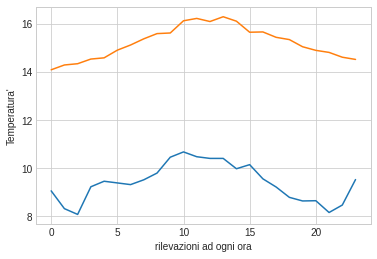

In [ ]:
#
# visualizzazione valori reali e valori predetti a confronto - 1 giorno
#

plt.plot(DF_SM_01_2021_true["Temperatura"].head(24))
plt.plot(DF_SM_01_2021_N2["Temperatura"].head(24))
plt.ylabel("Temperatura\'")
plt.xlabel("rilevazioni ad ogni ora")
plt.show()

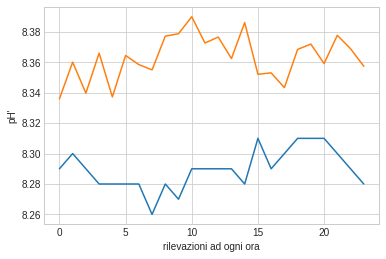

In [ ]:
#
# visualizzazione valori reali e valori predetti a confronto - 1 giorno
#

plt.plot(DF_SM_01_2021_true["pH"].head(24))
plt.plot(DF_SM_01_2021_N2["pH"].head(24))
plt.ylabel("pH\'")
plt.xlabel("rilevazioni ad ogni ora")
plt.show()

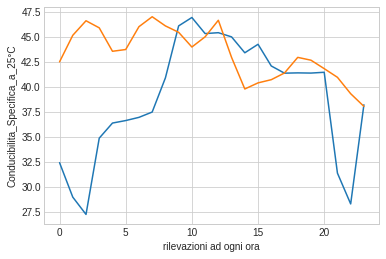

In [ ]:
#
# visualizzazione valori reali e valori predetti a confronto - 1 giorno
#

plt.plot(DF_SM_01_2021_true["Conducibilita_Specifica_a_25C"].head(24))
plt.plot(DF_SM_01_2021_N2["Conducibilita_Specifica_a_25C"].head(24))
plt.ylabel("Conducibilita_Specifica_a_25°C")
plt.xlabel("rilevazioni ad ogni ora")
plt.show()

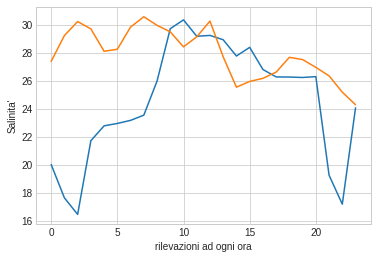

In [ ]:
#
# visualizzazione valori reali e valori predetti a confronto - 1 giorno
#

plt.plot(DF_SM_01_2021_true["Salinita"].head(24))
plt.plot(DF_SM_01_2021_N2["Salinita"].head(24))
plt.ylabel("Salinita\'")
plt.xlabel("rilevazioni ad ogni ora")
plt.show()

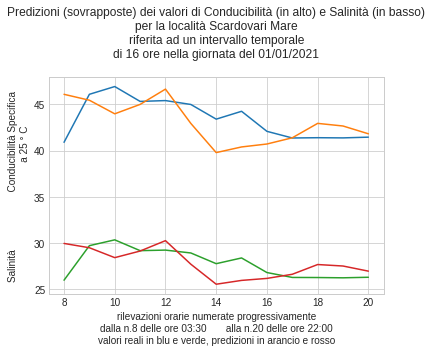

In [ ]:
#
# VISIVAMENTE SI INTUISCE CHE LE PREVISIONI PIU' ATTENDIBILI RIGUARDANO LE GRANDEZZE
#
# Conducibilita_Specifica_a_25C
# Salinita
#
# NELLE RILEVAZIONI GIORNALIERE DALLA N.8  ALLA N. 20
# OVVERO NELLA FASCIA ORARIA DALLE ORE 03:30:00 ALLE ORE 22:00:00
#
# UNA PRIMA VERIFICA VISIVA MEDIANTE PLOT
#
# visualizzazione valori reali e valori predetti a confronto - 1 giorno
#
plt.style.use('seaborn-whitegrid')
plt.title("Predizioni (sovrapposte) dei valori di Conducibilità (in alto) e Salinità (in basso)\nper la località Scardovari Mare\nriferita ad un intervallo temporale\ndi 16 ore nella giornata del 01/01/2021\n")
plt.plot(DF_SM_01_2021_true["Conducibilita_Specifica_a_25C"].loc[8:20])
plt.plot(DF_SM_01_2021_N2["Conducibilita_Specifica_a_25C"].loc[8:20])
plt.plot(DF_SM_01_2021_true["Salinita"].loc[8:20])
plt.plot(DF_SM_01_2021_N2["Salinita"].loc[8:20])
plt.ylabel("Salinità                     Conducibilità Specifica\n                               a 25 ° C")
plt.xlabel("rilevazioni orarie numerate progressivamente\ndalla n.8 delle ore 03:30       alla n.20 delle ore 22:00\nvalori reali in blu e verde, predizioni in arancio e rosso")
plt.show()

# **TO BE CONTINUED...**